In [2]:
import pandas as pd

### Reading Data and Understanding Your Dataset

Before you start training your model, it's important to understand a few key aspects of your dataset:
- **What is the unit of observation?**
    In other words, what does each row in your dataset represent? For example, is each row a user, a state, a product, or a type of loan? Understanding this will help you interpret your results correctly.

-  **What is the dimension of the dataset?**
    How many rows (observations) and columns (variables/features) are there? This gives you a sense of the size and complexity of your data.

- **What is the response variable (also called the target variable)?**
    This is the variable you are trying to predict or understand. If there is a response variable, you will likely be using supervised learning techniques. If there isn’t a clear response variable, then unsupervised learning methods (like clustering or dimensionality reduction) may be more appropriate.

    Hint: Ask yourself if a decimal value makes sense as a possible output for the model. If yes it makes sense (e.g., $2.50, 2.5 hours, 2.5 feet), then your response variable is likely numeric, and you are dealing with a regression problem.
    
    If not (e.g., halfway between “red” and “blue” doesn’t make sense), then your response variable is categorical, and you are likely working on a classification problem.

- **How do the independent variables (also called features, predictors, or covariates) relate to the response variable?**
    Understanding this relationship, through data exploration and visualizations, can help you choose the right model and improve your model's performance. Do some variables seem to have a strong connection to the outcome? Are there patterns or trends? Is there a non-linear relationship between any of the independent variables and the response variable?

#### What is the unit of observation?

Understanding what each row means in your dataset is really important for modeling. For instance, if you have a dataset that contains loan delinquency data that is aggregated by state and year but you want to build a predictive model about predicting individual loan deliquencies, then you might be in trouble. To go more in detail, if your model is trained using state aggregated data, it was not trained with data that have the same level of detail as what you want it to do (example: your training data can have a column called total number of below living below the poverty line in a state, but if you want your model to predict the likelihood of delinqency for 1 person, you don't have the total number of below living below the poverty line). 

Now, you may ask, so can create a model that predicts the deliquency rate for a given state at a given year? Yes! In this case, the row guanarlarity matches up (each row in your data is a state at a given year and you want to predict a state at a given year). **Note** If you are doing a time series model (is a dataset where time is a key feature and the order of the data matters such as monthly sales revenue, stock prices), be sure to careful during the train test split phase.

To sum this section all up, it is really crucial to understand what each row means and make sure it matched with what you want your model to predict. So, you might ask, how do I figure that out?

Look at the dataframe and figure out what is unique about each row. In this case, we can see that each row seems to be a unique individual, so I can create some kind of model to predict loan delinquency for an individual. 

#### What is the dimension of the data set? 

Aka do you have enough to work with? Do I have enough rows to train my data without introducing too much variance into your model? Do I have enough independent variables to try different combinations and do some feature engineering? (if your dataset only have 1-2 independent variables, your model may not be able to capture the real relationship (this is called introducing bias to the model))

In [3]:
# Depending on the format of your file, you may need to specify the sep (seperator) type
# 
train_df = pd.read_csv("train.csv", sep = ";")

print (f"""The shape of the dataset is {train_df.shape} with 
       {train_df.shape[0]} rows and {train_df.shape[1]} columns.""")
# This is called formatted string literals. It is commonly used to format print
# outputs.

# Another way to code this is
# print("The shape of the dataset is", train_df.shape, "with", train_df.shape[0], "rows and", train_df.shape[1], "columns.")

# df.head(n) grabs the first n rows
# df.tail(n) grabs the last n rows

# I usually start with this head function to get a better idea of the columns
# in my dataframe. Understand the datatype (integer, double, boolean, etc.) for
# the columns that I have.
train_df.head(10)

The shape of the dataset is (45211, 17) with 
       45211 rows and 17 columns.


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


Looking at the dataset, it seems like I am dealing with mostly categorical variables (eg. variables that have clear categories as to what they values can be) (example of categorical variables: job, marital, y).

There is also a clear y variable (also called target variable, response variable, etc.). The y variable is binary (a special type of categorical variable with just 2 possible outcomes). It is either: 
- yes (the customer was converted and the campaign was successful in bringing in the customer)
- no (the customer was not converted and the campaign was not successful).

Next, I may want to understand how many nulls there are and see what I can do to reduce the number of nulls

In [4]:
# The function isna returns a boolean Series for each column of your dataset 
# and the sum function adds up all the rows such that the condition is true 
# (there is a null)
train_df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In this case, there are no nulls, but I want to make sure that there are no corrupt enteries (example: you have a negative value for $/hr fare amount or a value greater than 200 for age). It is important to ensure that the dataset accurately represents reality (so you model can learn the true relationships between variables and be useful). 

With the goal of avoiding bias in your final model, be sure to understand the dataset well! Starting with functions such as df.describe(), sns.boxplot, etc, be sure to know the distribution of your variables and see if there are any outliers!

In [5]:
# df.describe() outputs the summary statistics for numeric columns in your dataframe
# Note how I did not remove the columns that are string type (categorical) and 
# function automatically excludes it.
# 
# If there is a column that is numeric, but the numbers represent categories, 
# and you want to exlude it, then you could specify the subset of columns you
# want to apply the describe function on. 
# example: train_df[["age", "campaing"]].describe()

train_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


What are some observations? 
Tip: Look to understand the distribution of these continuous variables and the extremes (min and max). Do they make sense in the context of what the variable is supposed to represent.

Example:
- It seems like the age variable is slightly skewed to the right since the mean is greater than the median. 
- My age covariate ranges from 18 years old to 95 years old, so it is representative of the population that can borrow a loan. However, I might need to see if there sample is fair in representation.
- There seems to be a negative balance --> What does that mean? Is that an error or does that make sense? How many users have a negative balance?


In addition to exploring the covariate, a large part of the EDA is understanding your response variable and how different independent variables correlate with it.

In [ ]:
# when you have categories and you want to understand how many rows there are
# for each category, you can use df[column name].value_counts()

train_df["y"].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [ ]:
# If you want the proportion rather than the count, you can set the normalize
# argument to be true.
train_df["y"].value_counts(normalize = True)

y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

We can see that as expected, there is an uneven distribution in the response variable. This is very problematic to have an underrepresented minority class in some cases (especially in cases where you have a really small number like 10). If you have a severely underrepresented minority class for your response variable, you might want to consider 
- downsampling your majority class: including less of the rows where the outcome is "no"
- upsampling your minority class: including more of the rows where the outcome is "yes"


Beyond just the response variable, let's take a closer look at how the response might relate to the other variables! 

If you are doing regression (your response variable is continous), then a common first step could be a correlation matrix. What if your outcome is binary? 

Some approaches I take are two way proportion tables, bargraphs, boxplots, etc.

In [9]:
pd.crosstab(train_df["y"], train_df["marital"], normalize = True)

marital,divorced,married,single
y,,,
no,0.101413,0.540997,0.240605
yes,0.013758,0.060936,0.042291


In [10]:
pd.crosstab(train_df["y"], train_df["marital"])

marital,divorced,married,single
y,,,
no,4585,24459,10878
yes,622,2755,1912


<Axes: xlabel='age', ylabel='y'>

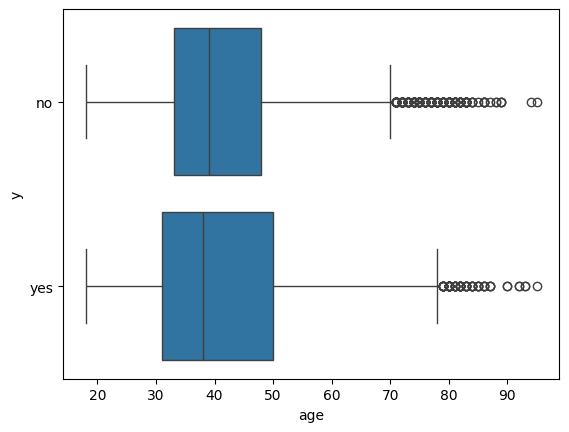

In [12]:
import seaborn as sns
sns.boxplot(data = train_df, x = 'age', y = 'y')